In [198]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [199]:
p=os.listdir("C:/Users/manor/Desktop/babu's ip/db/")
je=os.listdir("C:/Users/manor/Desktop/babu's ip/kj/")
jk=os.listdir("C:/Users/manor/Desktop/babu's ip/ss/")

In [200]:
limit=10
p_images = [None]*limit
je_images = [None]*limit
jk_images = [None]*limit
j=0
for i in p:
    if(j<limit):
        p_images[j]=imread("C:/Users/manor/Desktop/babu's ip/db/"+i)
        j+=1
    else:
        break

j=0
for i in je:
    if(j<limit):
        je_images[j]=imread("C:/Users/manor/Desktop/babu's ip/kj/"+i)
        j+=1
    else:
        break
j=0
for i in jk:
    if(j<limit):
        jk_images[j]=imread("C:/Users/manor/Desktop/babu's ip/ss/"+i)
        j+=1
    else:
        break
        

In [201]:
p_gray=[None]*limit
je_gray=[None]*limit
jk_gray=[None]*limit
j=0

for i in p:
    if(j<limit):
        p_gray[j]=rgb2gray(p_images[j])
        j+=1
    else:
        break
j=0
for i in je:
    if(j<limit):
        je_gray[j]=rgb2gray(je_images[j])
        j+=1
    else:
        break
    

j=0
for i in jk:
    if(j<limit):
        jk_gray[j]=rgb2gray(jk_images[j])
        j+=1
    else:
        break


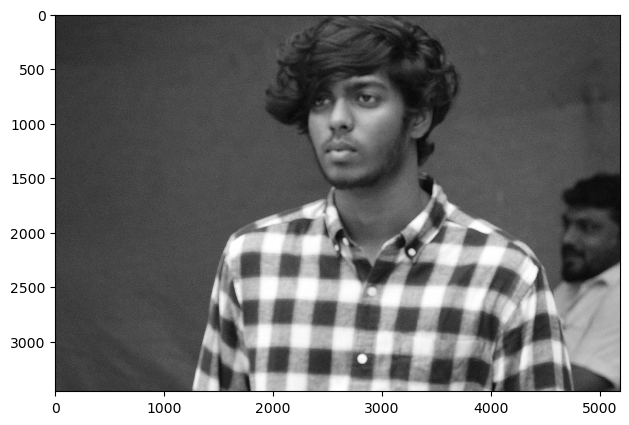

In [202]:
imshow(p_gray[9])

In [203]:
p_gray[2].shape

(3456, 5184)

In [204]:
for j in range(10):
    jk_temp=jk_gray[j]
    jk_gray[j]=resize(jk_temp,(512,512))

In [205]:
for j in range(10):
    p_temp=p_gray[j]
    p_gray[j]=resize(p_temp,(512,512))
for j in range(10):
    je_temp=je_gray[j]
    je_gray[j]=resize(je_temp,(512,512))


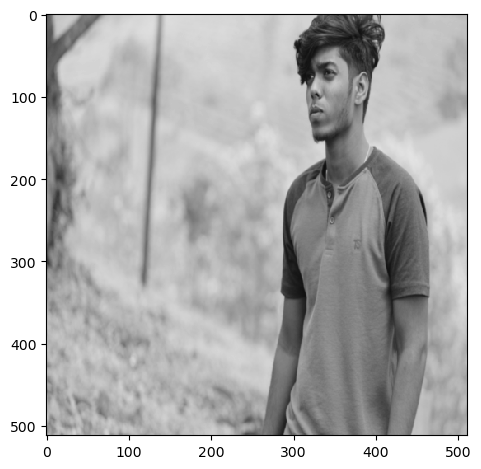

In [206]:
imshow(p_gray[2])

In [207]:
len_of_jk=len(jk_gray)
len_of_je=len(je_gray)
len_of_p=len(p_gray)

In [208]:
image_size_jk=jk_gray[1].shape
image_size_p=p_gray[1].shape
image_size_je=je_gray[1].shape

In [209]:
image_size_p

(512, 512)

In [210]:
flatten_size_jk=image_size_jk[0]*image_size_jk[1]
flatten_size_p=image_size_p[0]*image_size_p[1]
flatten_size_je=image_size_je[0]*image_size_je[1]


In [211]:
flatten_size_p

262144

In [212]:
for i in range(len_of_jk):
    jk_gray[i]= np.ndarray.flatten(jk_gray[i].reshape(flatten_size_jk,1))
for i in range(len_of_p):
    p_gray[i]= np.ndarray.flatten(p_gray[i].reshape(flatten_size_p,1))
for i in range(len_of_je):
    je_gray[i]= np.ndarray.flatten(je_gray[i].reshape(flatten_size_je,1))

In [213]:
jk_gray=np.dstack(jk_gray)
p_gray=np.dstack(p_gray)
je_gray=np.dstack(je_gray)

In [214]:

p_gray.shape

(1, 262144, 10)

In [215]:
jk_gray=np.rollaxis(jk_gray,axis=2,start=0)
p_gray=np.rollaxis(p_gray,axis=2,start=0)
je_gray=np.rollaxis(je_gray,axis=1,start=0)


In [216]:
p_gray=np.rollaxis(p_gray,axis=2,start=1)
jk_gray=np.rollaxis(jk_gray,axis=2,start=1)

In [217]:
je_gray.shape

(262144, 1, 10)

In [218]:
jk_gray=jk_gray.reshape(len_of_jk,flatten_size_jk)
p_gray=p_gray.reshape(len_of_p,flatten_size_p)
je_gray=je_gray.reshape(len_of_je,flatten_size_je)

In [219]:

je_gray.shape


(10, 262144)

In [220]:
jk_data=pd.DataFrame(jk_gray)
p_data=pd.DataFrame(p_gray)
je_data=pd.DataFrame(je_gray)

In [221]:
p_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.298385,0.304354,0.309044,0.314711,0.318116,0.320616,0.319388,0.315481,0.308663,0.303909,...,0.613911,0.606086,0.599829,0.594317,0.590544,0.588180,0.584498,0.577442,0.571846,0.570396
1,0.335590,0.336831,0.340320,0.334963,0.331123,0.325630,0.333081,0.328732,0.329032,0.330174,...,0.864435,0.882005,0.869913,0.829035,0.830996,0.821542,0.814194,0.570677,0.436857,0.398673
2,0.370158,0.377968,0.390858,0.401179,0.405919,0.427912,0.470624,0.538708,0.605585,0.663464,...,0.672410,0.687813,0.699731,0.707031,0.711154,0.714102,0.713062,0.704245,0.692839,0.684129
3,0.747525,0.740834,0.717503,0.677254,0.620199,0.537934,0.426050,0.325176,0.306256,0.313325,...,0.698244,0.711725,0.720424,0.728374,0.735554,0.744077,0.748822,0.755157,0.757001,0.755123
4,0.669465,0.649398,0.628910,0.609230,0.592340,0.581865,0.565436,0.528838,0.476461,0.395541,...,0.469501,0.461553,0.455642,0.455128,0.468461,0.476663,0.476282,0.477925,0.477997,0.481579
5,0.069192,0.070538,0.069930,0.068854,0.070261,0.073902,0.072759,0.074759,0.075855,0.075140,...,0.329500,0.323892,0.313194,0.314462,0.304366,0.307915,0.304310,0.295941,0.286497,0.286335
6,0.902439,0.893084,0.882001,0.878044,0.879251,0.882380,0.881117,0.879321,0.867656,0.857887,...,0.452175,0.476269,0.494339,0.508680,0.512192,0.506531,0.496963,0.482775,0.455684,0.409786
7,0.550114,0.508412,0.473083,0.472181,0.502819,0.550530,0.610793,0.713430,0.748450,0.759709,...,0.370661,0.356649,0.345284,0.332881,0.324468,0.312971,0.302530,0.290569,0.283926,0.277943
8,0.550114,0.508412,0.473083,0.472181,0.502819,0.550530,0.610793,0.713430,0.748450,0.759709,...,0.370661,0.356649,0.345284,0.332881,0.324468,0.312971,0.302530,0.290569,0.283926,0.277943
9,0.180474,0.181051,0.180046,0.187027,0.187230,0.187885,0.187985,0.184994,0.187784,0.188289,...,0.225911,0.238913,0.249871,0.264710,0.289917,0.311873,0.326982,0.334936,0.338581,0.340880


In [222]:
jk_data["label"]="SadieSink"
p_data["label"]="Dheepak"
je_data["label"]="KylieJenner"

In [223]:
je_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.422761,0.467638,0.800962,0.007611,0.376581,0.324098,0.994129,0.951855,0.865931,0.606680,...,0.019705,0.186728,0.952420,0.911627,0.541672,0.115764,0.454360,0.614907,0.012330,KylieJenner
1,0.373942,0.019508,0.181292,0.952420,0.890889,0.539703,0.118564,0.454037,0.620639,0.012006,...,0.143720,0.717074,0.499692,0.749652,0.138727,0.037508,0.103980,0.184715,0.089224,KylieJenner
2,0.220701,0.158953,0.732696,0.499088,0.739857,0.128114,0.035277,0.104799,0.194081,0.084689,...,0.336461,0.041463,0.567681,0.237074,0.503971,0.704820,0.359351,0.783889,0.580508,KylieJenner
3,0.142881,0.288692,0.041463,0.563476,0.227279,0.458902,0.694563,0.339846,0.777847,0.583846,...,0.067485,0.896998,0.135071,0.430843,0.628737,0.633072,0.024953,0.382404,0.303057,KylieJenner
4,0.071247,0.067485,0.934921,0.127474,0.432228,0.627076,0.637261,0.028016,0.380297,0.295632,...,0.771462,0.682736,0.025349,0.347263,0.002238,0.967328,0.571191,0.905551,0.583436,KylieJenner
5,0.430910,0.834145,0.388322,0.141751,0.345581,0.070024,0.986278,0.956647,0.870192,0.637594,...,0.625061,0.227730,0.079709,0.044572,0.556176,0.425712,0.846394,0.619518,0.051487,KylieJenner
6,0.360895,0.626278,0.178928,0.089274,0.042868,0.555307,0.426585,0.849136,0.624098,0.085421,...,0.060999,0.638817,0.702149,0.674338,0.410617,0.092709,0.446825,0.606113,0.624033,KylieJenner
7,0.016942,0.062662,0.630868,0.720588,0.677341,0.450784,0.121961,0.446900,0.621611,0.619678,...,0.532859,0.273182,0.476404,0.748996,0.530735,0.207901,0.619035,0.698636,0.763929,KylieJenner
8,0.257079,0.497854,0.222974,0.475002,0.747558,0.525128,0.205218,0.631129,0.691666,0.763593,...,0.035377,0.485245,0.073327,0.250050,0.819552,0.387184,0.723701,0.363315,0.308693,KylieJenner
9,0.567414,0.036286,0.477450,0.070801,0.250516,0.824454,0.369948,0.708767,0.363315,0.306756,...,0.297951,0.840708,0.031373,0.342968,0.919094,0.754071,0.614769,0.880900,0.432276,KylieJenner


In [224]:
a_1=pd.concat([jk_data,p_data])

In [225]:
img=pd.concat([a_1,je_data])

In [226]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,...,0.061499,0.060098,0.058696,0.057294,0.055893,0.055467,0.055467,0.055467,0.055467,SadieSink
1,0.182922,0.182922,0.182922,0.182922,0.182922,0.182922,0.182922,0.182922,0.182922,0.182922,...,0.157428,0.157428,0.157428,0.157428,0.157428,0.157428,0.157038,0.152488,0.151232,SadieSink
2,0.032663,0.032835,0.029583,0.029076,0.027488,0.027265,0.027758,0.028005,0.027691,0.024732,...,0.487858,0.487594,0.486589,0.486039,0.486211,0.483512,0.483605,0.485654,0.485855,SadieSink
3,0.363904,0.363761,0.354228,0.333933,0.306953,0.311521,0.323264,0.325216,0.320979,0.276988,...,0.098329,0.091517,0.141047,0.268432,0.327484,0.361840,0.258212,0.122549,0.119545,SadieSink
4,0.768627,0.768627,0.768627,0.768627,0.768627,0.768627,0.770335,0.772549,0.772549,0.773537,...,0.140754,0.149234,0.147595,0.143888,0.136764,0.143083,0.157330,0.248161,0.280423,SadieSink
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SadieSink
6,0.530045,0.529616,0.527441,0.525265,0.523090,0.519461,0.516236,0.514773,0.514443,0.515906,...,0.654413,0.654989,0.657755,0.654181,0.649093,0.640393,0.631990,0.624753,0.623326,SadieSink
7,0.203879,0.212018,0.223711,0.230617,0.209169,0.196683,0.189994,0.189854,0.190231,0.190231,...,0.120191,0.127400,0.122792,0.118689,0.110737,0.100403,0.094151,0.087879,0.087126,SadieSink
8,0.754990,0.808498,0.825721,0.820756,0.804075,0.780150,0.784209,0.795230,0.801093,0.808571,...,0.835856,0.820093,0.793605,0.765696,0.742919,0.734669,0.742851,0.757231,0.765133,SadieSink
9,0.439418,0.415056,0.410629,0.412419,0.418471,0.424236,0.433316,0.435848,0.421936,0.433235,...,0.286984,0.307896,0.325677,0.325774,0.304383,0.262645,0.215405,0.177597,0.179316,SadieSink


In [227]:
from sklearn.utils import shuffle

In [228]:
img_shuffle = shuffle(img).reset_index()

In [229]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,5,0.069192,0.070538,0.069930,0.068854,0.070261,0.073902,0.072759,0.074759,0.075855,...,0.323892,0.313194,0.314462,0.304366,0.307915,0.304310,0.295941,0.286497,0.286335,Dheepak
1,8,0.550114,0.508412,0.473083,0.472181,0.502819,0.550530,0.610793,0.713430,0.748450,...,0.356649,0.345284,0.332881,0.324468,0.312971,0.302530,0.290569,0.283926,0.277943,Dheepak
2,2,0.032663,0.032835,0.029583,0.029076,0.027488,0.027265,0.027758,0.028005,0.027691,...,0.487858,0.487594,0.486589,0.486039,0.486211,0.483512,0.483605,0.485654,0.485855,SadieSink
3,0,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,...,0.061499,0.060098,0.058696,0.057294,0.055893,0.055467,0.055467,0.055467,0.055467,SadieSink
4,3,0.747525,0.740834,0.717503,0.677254,0.620199,0.537934,0.426050,0.325176,0.306256,...,0.711725,0.720424,0.728374,0.735554,0.744077,0.748822,0.755157,0.757001,0.755123,Dheepak
5,4,0.768627,0.768627,0.768627,0.768627,0.768627,0.768627,0.770335,0.772549,0.772549,...,0.140754,0.149234,0.147595,0.143888,0.136764,0.143083,0.157330,0.248161,0.280423,SadieSink
6,7,0.016942,0.062662,0.630868,0.720588,0.677341,0.450784,0.121961,0.446900,0.621611,...,0.532859,0.273182,0.476404,0.748996,0.530735,0.207901,0.619035,0.698636,0.763929,KylieJenner
7,7,0.203879,0.212018,0.223711,0.230617,0.209169,0.196683,0.189994,0.189854,0.190231,...,0.120191,0.127400,0.122792,0.118689,0.110737,0.100403,0.094151,0.087879,0.087126,SadieSink
8,5,0.430910,0.834145,0.388322,0.141751,0.345581,0.070024,0.986278,0.956647,0.870192,...,0.625061,0.227730,0.079709,0.044572,0.556176,0.425712,0.846394,0.619518,0.051487,KylieJenner
9,2,0.370158,0.377968,0.390858,0.401179,0.405919,0.427912,0.470624,0.538708,0.605585,...,0.687813,0.699731,0.707031,0.711154,0.714102,0.713062,0.704245,0.692839,0.684129,Dheepak


In [230]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [231]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.069192,0.070538,0.069930,0.068854,0.070261,0.073902,0.072759,0.074759,0.075855,0.075140,...,0.323892,0.313194,0.314462,0.304366,0.307915,0.304310,0.295941,0.286497,0.286335,Dheepak
1,0.550114,0.508412,0.473083,0.472181,0.502819,0.550530,0.610793,0.713430,0.748450,0.759709,...,0.356649,0.345284,0.332881,0.324468,0.312971,0.302530,0.290569,0.283926,0.277943,Dheepak
2,0.032663,0.032835,0.029583,0.029076,0.027488,0.027265,0.027758,0.028005,0.027691,0.024732,...,0.487858,0.487594,0.486589,0.486039,0.486211,0.483512,0.483605,0.485654,0.485855,SadieSink
3,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,0.546949,...,0.061499,0.060098,0.058696,0.057294,0.055893,0.055467,0.055467,0.055467,0.055467,SadieSink
4,0.747525,0.740834,0.717503,0.677254,0.620199,0.537934,0.426050,0.325176,0.306256,0.313325,...,0.711725,0.720424,0.728374,0.735554,0.744077,0.748822,0.755157,0.757001,0.755123,Dheepak
5,0.768627,0.768627,0.768627,0.768627,0.768627,0.768627,0.770335,0.772549,0.772549,0.773537,...,0.140754,0.149234,0.147595,0.143888,0.136764,0.143083,0.157330,0.248161,0.280423,SadieSink
6,0.016942,0.062662,0.630868,0.720588,0.677341,0.450784,0.121961,0.446900,0.621611,0.619678,...,0.532859,0.273182,0.476404,0.748996,0.530735,0.207901,0.619035,0.698636,0.763929,KylieJenner
7,0.203879,0.212018,0.223711,0.230617,0.209169,0.196683,0.189994,0.189854,0.190231,0.190231,...,0.120191,0.127400,0.122792,0.118689,0.110737,0.100403,0.094151,0.087879,0.087126,SadieSink
8,0.430910,0.834145,0.388322,0.141751,0.345581,0.070024,0.986278,0.956647,0.870192,0.637594,...,0.625061,0.227730,0.079709,0.044572,0.556176,0.425712,0.846394,0.619518,0.051487,KylieJenner
9,0.370158,0.377968,0.390858,0.401179,0.405919,0.427912,0.470624,0.538708,0.605585,0.663464,...,0.687813,0.699731,0.707031,0.711154,0.714102,0.713062,0.704245,0.692839,0.684129,Dheepak


In [232]:
img_shuffle.shape

(30, 262145)

In [233]:
x = img_shuffle.values[:,:-1]

In [234]:
y= img_shuffle.values[:,-1]

In [235]:
x

array([[0.06919183600205848, 0.07053758847240735, 0.06993012979938892,
        ..., 0.2959413724923875, 0.286497140828254, 0.28633457685316427],
       [0.5501141096115011, 0.5084120969176917, 0.4730834574443193, ...,
        0.2905688688270565, 0.28392630845686745, 0.27794290216991135],
       [0.03266253852710132, 0.03283527294106745, 0.029583298329728256,
        ..., 0.4836046172255185, 0.48565355326335047, 0.4858548260608946],
       ...,
       [0.2983852977929278, 0.3043538810546349, 0.30904389679965805, ...,
        0.5774424440819999, 0.5718464041485904, 0.5703959587195752],
       [0.9024391066676501, 0.8930840065061417, 0.8820014345766765, ...,
        0.48277507280207277, 0.4556837067307914, 0.40978561844042477],
       [0.6694652572504327, 0.6493983388133291, 0.628910443523116, ...,
        0.477925096644422, 0.47799690590942606, 0.48157850844817146]],
      dtype=object)

In [236]:
y

array(['Dheepak', 'Dheepak', 'SadieSink', 'SadieSink', 'Dheepak',
       'SadieSink', 'KylieJenner', 'SadieSink', 'KylieJenner', 'Dheepak',
       'SadieSink', 'KylieJenner', 'KylieJenner', 'Dheepak', 'Dheepak',
       'SadieSink', 'SadieSink', 'Dheepak', 'SadieSink', 'KylieJenner',
       'KylieJenner', 'SadieSink', 'SadieSink', 'KylieJenner',
       'KylieJenner', 'KylieJenner', 'KylieJenner', 'Dheepak', 'Dheepak',
       'Dheepak'], dtype=object)

In [237]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [238]:
from sklearn import svm

In [239]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [240]:
y_pred=clf.predict(x_test)

In [241]:
y_pred

array(['SadieSink', 'KylieJenner', 'Dheepak', 'SadieSink', 'KylieJenner',
       'KylieJenner'], dtype=object)

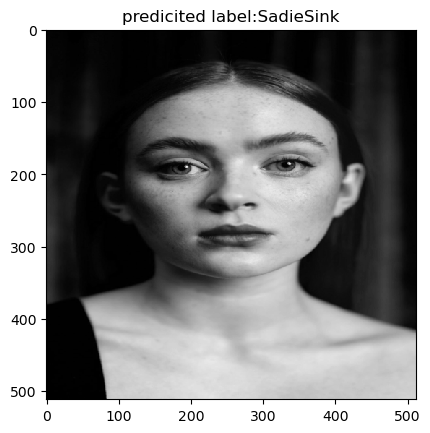

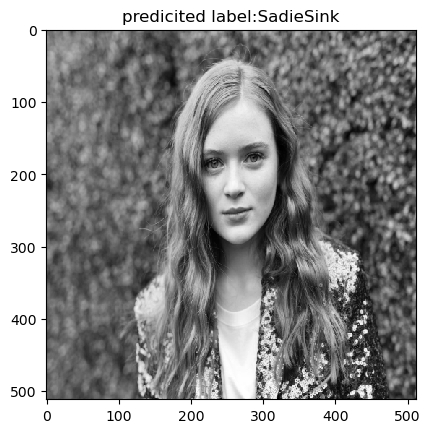

In [242]:
for i in (np.random.randint(0,6,2)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.double))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [243]:
from sklearn import metrics

In [244]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [245]:
accuracy

0.8333333333333334

In [246]:
from sklearn.metrics import confusion_matrix

In [247]:
confusion_matrix(y_test,y_pred)

array([[1, 1, 0],
       [0, 2, 0],
       [0, 0, 2]], dtype=int64)